<a href="https://colab.research.google.com/github/Alvaro3110/teste2/blob/main/Vis%C3%A3o_Computacional_Lidar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving pcl.csv to pcl (2).csv
Counter({0: 1088, 1: 763, 2: 327, -1: 122})
              x           y
104  380.528937  392.035472
131  210.428384  308.024929
250   -5.356246  527.272630
644 -369.554525 -489.664224
677 -265.853195 -557.433895
Numero de clusters = 3


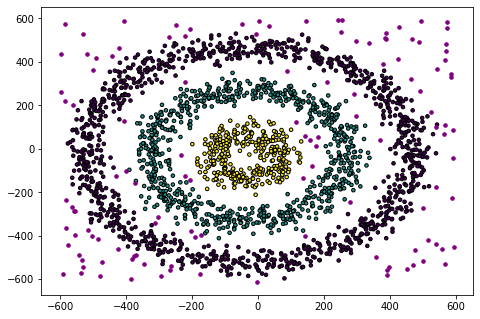

In [ ]:
import pandas as pd #OK
import numpy as np #OK
import matplotlib.pyplot as plt #OK
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from scipy.spatial import distance
from collections import Counter
from google.colab import files
uploaded = files.upload()
import io

#Banco de Dados
df = pd.read_csv (io.BytesIO (uploaded ['pcl.csv']))
#Alguma coisa
dbscan_data = df[['x','y']]
dbscan_data = dbscan_data.values.astype('float32',copy=False)
dbscan_data
#Pré-Processamento
dbscan_data_scaler = StandardScaler().fit(dbscan_data)
dbscan_data = dbscan_data_scaler.transform(dbscan_data)
dbscan_data

#Construção do Modelo
model = DBSCAN(eps=0.16,min_samples =15,metric='euclidean').fit(dbscan_data)

#Visualizar Resultado
outliers_df = df[model.labels_==-1]
clusters_df = df[model.labels_!=-1]

colors = model.labels_
colors_clusters = model.labels_colors_clusters = colors[colors != -1]
colors_outliers = 'purple'

clusters = Counter(model.labels_)
print(clusters)
print(df[model.labels_ == -1].head())
print('Numero de clusters = {}'.format(len(clusters)-1))

fig = plt.figure()

ax = fig.add_axes([0.1,0.1,1,1])
ax.scatter(clusters_df['x'], clusters_df['y'],marker ='.',c = colors_clusters, edgecolors ='black', s=50)
ax.scatter(outliers_df['x'], outliers_df['y'],marker ='.',c = colors_outliers, edgecolors ='purple', s=50)